# Pengolahan Data Angin

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore') # for ignoring the warnings

In [2]:
ds_wind=xr.open_dataset('wind_java_sea.nc',
                    chunks={'time':1})
ds_wind

<xarray.Dataset>
Dimensions:    (time: 168, longitude: 65, latitude: 41)
Coordinates:
  * time       (time) datetime64[ns] 2003-01-31 2003-02-28 ... 2016-12-31
  * longitude  (longitude) float32 101.0 101.2 101.5 101.8 ... 116.5 116.8 117.0
  * latitude   (latitude) float32 1.0 0.75 0.5 0.25 ... -8.25 -8.5 -8.75 -9.0
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>

Dari data angin diatas, didapatkan variable u dan v, yang merupakan komponen data angin. Sebelum kita mengolah data angin, kita harus menemukan terlebih dahulu nilai magnitude dari varialbe u dan v tersebut.
V = (u**2 + v**2)**0.5

# Excercise
1. Hitung wind_speed
2. Plot wind speed pada waktu ke-15 dengan .isel()

In [3]:
#Pertanyaan 1
wind_speed=(ds_wind.u10**2 + ds_wind.v10**2)**0.5

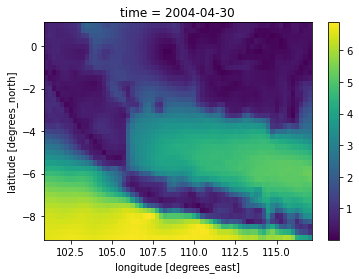

In [4]:
#Pertanyaan 2
wind_speed.isel(time=15).plot()

Setelah kita menemukan nilai wind_speed, kemudian kita akan memasukan nilai dari perhitungan wind_speed ke dalam dataset ds_wind

In [5]:
#Berikut cara memasukan data ke dalam dataset yang telah kita miliki
ds_wind['wind_speed'] = wind_speed

In [6]:
ds_wind

# data wind_speed sekarang sudah masuk ke dalam data ds_wind

<xarray.Dataset>
Dimensions:     (time: 168, longitude: 65, latitude: 41)
Coordinates:
  * time        (time) datetime64[ns] 2003-01-31 2003-02-28 ... 2016-12-31
  * longitude   (longitude) float32 101.0 101.2 101.5 ... 116.5 116.8 117.0
  * latitude    (latitude) float32 1.0 0.75 0.5 0.25 ... -8.25 -8.5 -8.75 -9.0
Data variables:
    u10         (time, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>
    v10         (time, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>
    wind_speed  (time, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>

# Excercise
1. Buatlah variable south_kalimantan_wind. Dengan boundary 3-5S, 110-116E (slice dengan menggunakan sel)
2. Rata-ratakan longitude dan latitude u10, v10 dan wind_speed dalam 1 gambar

In [7]:
#Pertanyaan 1
south_kalimantan_wind = ds_wind.sel(latitude=slice(-3,-5), longitude=slice(110, 116))
south_kalimantan_wind

<xarray.Dataset>
Dimensions:     (time: 168, longitude: 25, latitude: 9)
Coordinates:
  * time        (time) datetime64[ns] 2003-01-31 2003-02-28 ... 2016-12-31
  * longitude   (longitude) float32 110.0 110.2 110.5 ... 115.5 115.8 116.0
  * latitude    (latitude) float32 -3.0 -3.25 -3.5 -3.75 ... -4.5 -4.75 -5.0
Data variables:
    u10         (time, latitude, longitude) float32 dask.array<chunksize=(1, 9, 25), meta=np.ndarray>
    v10         (time, latitude, longitude) float32 dask.array<chunksize=(1, 9, 25), meta=np.ndarray>
    wind_speed  (time, latitude, longitude) float32 dask.array<chunksize=(1, 9, 25), meta=np.ndarray>

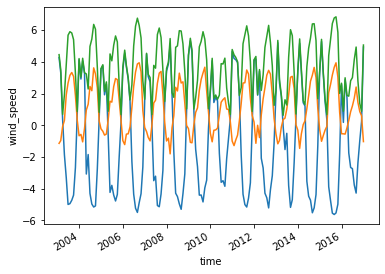

In [8]:
#Pertanyaan 2
south_kalimantan_wind.u10.mean(['latitude', 'longitude']).plot()
south_kalimantan_wind.v10.mean(['latitude', 'longitude']).plot()
south_kalimantan_wind.wind_speed.mean(['latitude', 'longitude']).plot()

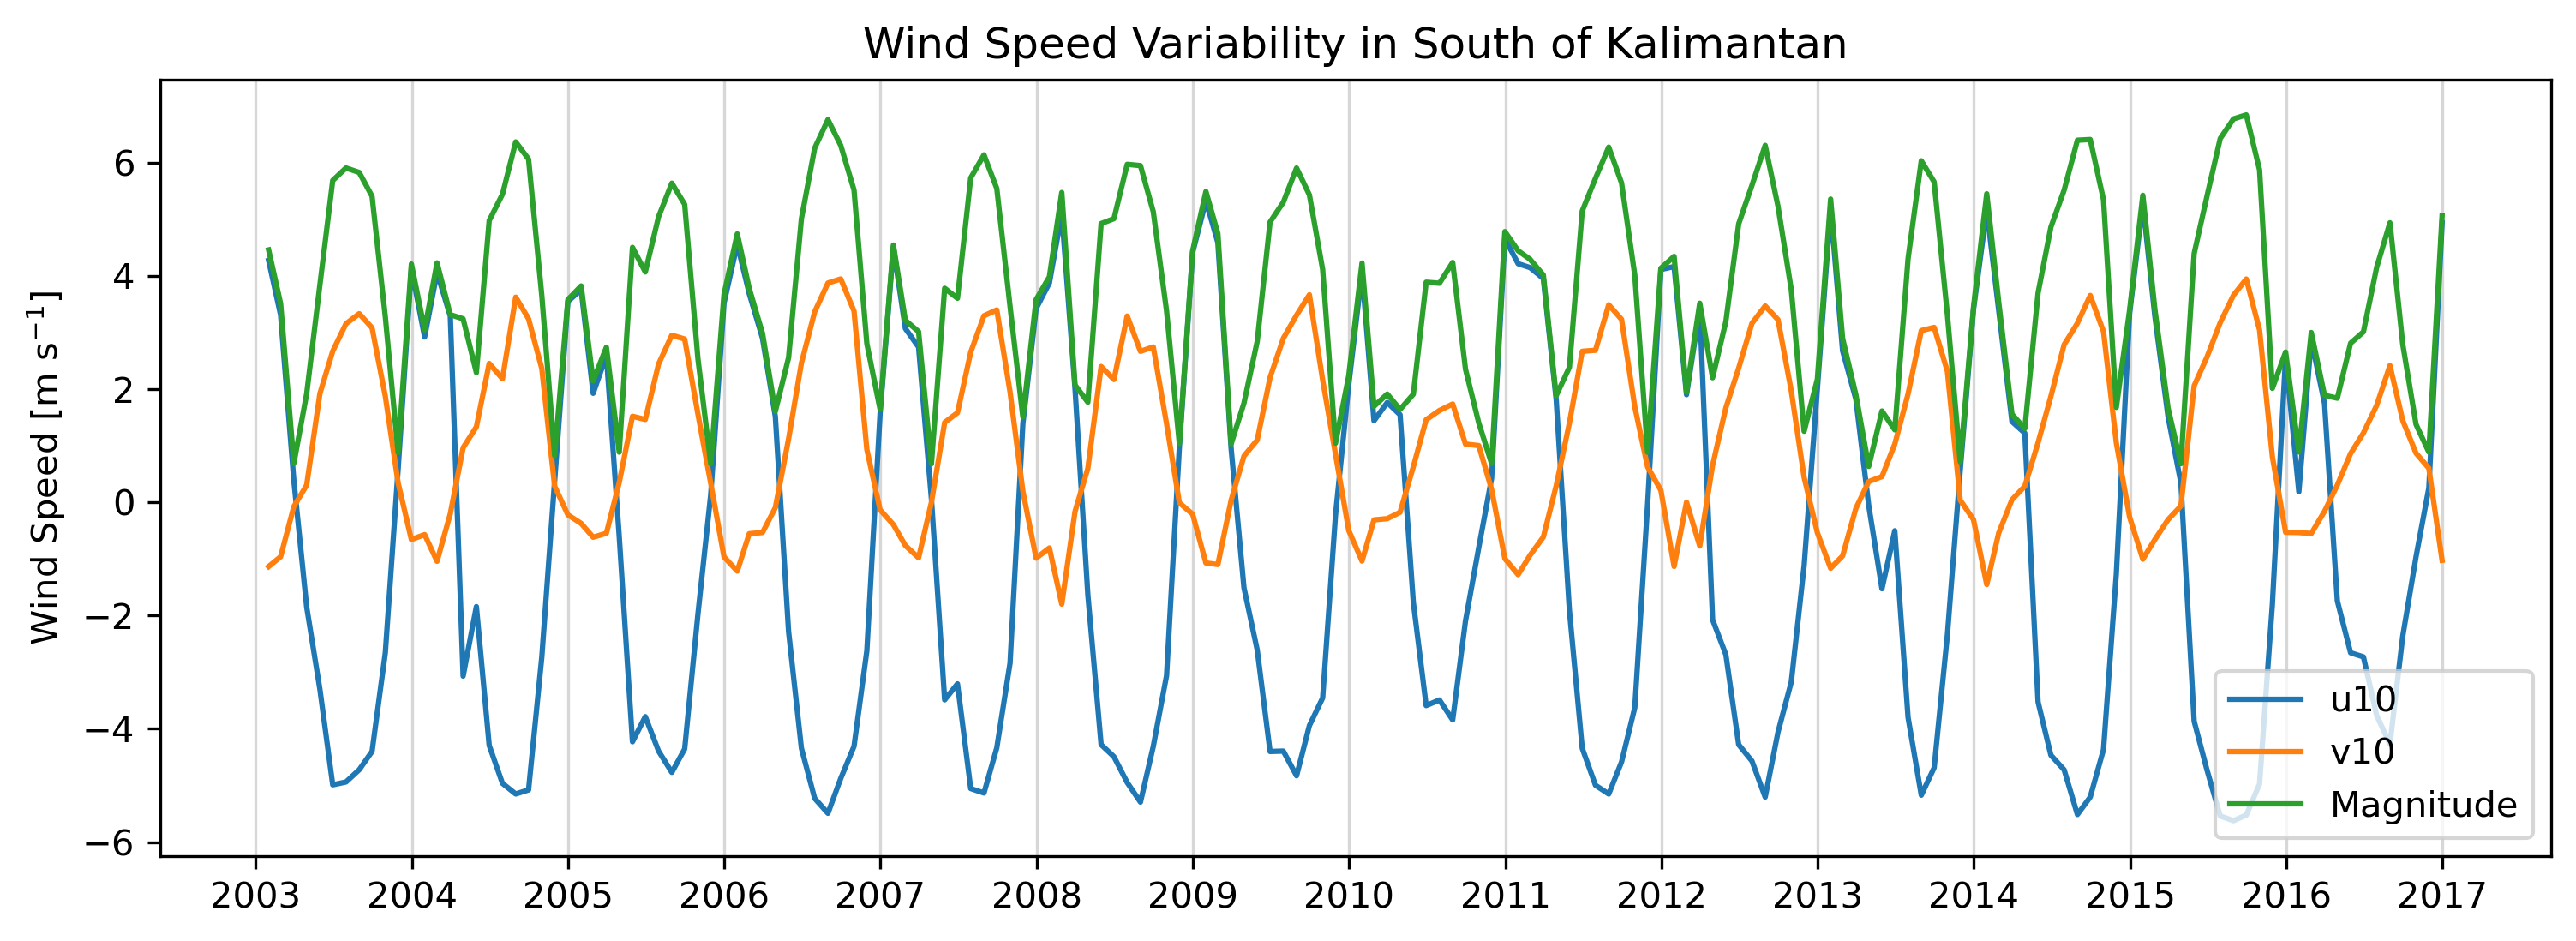

In [9]:
#Kita buat gambar diatas sesuai dengan kaidah gambar paper/artikel
fig, ax = plt.subplots(dpi=300, figsize=[12,4])

# zonal wind (u) 
ax.plot(south_kalimantan_wind.time,
        south_kalimantan_wind.u10.mean(['latitude','longitude']), label='u10')

# meridional wind (v)
ax.plot(south_kalimantan_wind.time,
        south_kalimantan_wind.v10.mean(['latitude','longitude']), label='v10')

# magnitude 
ax.plot(south_kalimantan_wind.time,
        south_kalimantan_wind.wind_speed.mean(['latitude','longitude']), label='Magnitude')

for_xticks = pd.date_range('2003','2017',freq='YS')
ax.set_xticks(for_xticks)
ax.set_xticklabels([str(i)[:4] for i in for_xticks])

ax.grid(axis='x', alpha=0.5)

ax.set_ylabel('Wind Speed [m s$^{-1}$]')
ax.set_title('Wind Speed Variability in South of Kalimantan')

ax.legend()

# Seasonal Variability

In [10]:
seasonal_wind = ds_wind.groupby('time.season').mean('time')
seasonal_wind

<xarray.Dataset>
Dimensions:     (longitude: 65, latitude: 41, season: 4)
Coordinates:
  * longitude   (longitude) float32 101.0 101.2 101.5 ... 116.5 116.8 117.0
  * latitude    (latitude) float32 1.0 0.75 0.5 0.25 ... -8.25 -8.5 -8.75 -9.0
  * season      (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    u10         (season, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>
    v10         (season, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>
    wind_speed  (season, latitude, longitude) float32 dask.array<chunksize=(1, 41, 65), meta=np.ndarray>

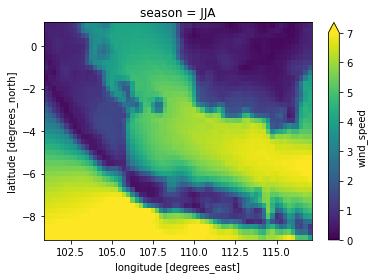

In [11]:
seasonal_wind.wind_speed.sel(season='JJA').plot(vmin=0, vmax=7)

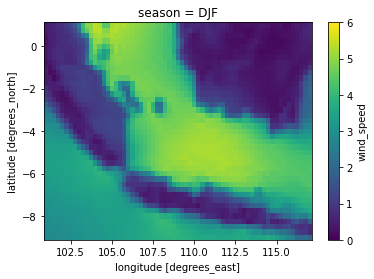

In [12]:
#Kita coba melakukan hal yang sama namun dengan season DJF
seasonal_wind.wind_speed.sel(season='DJF').plot(vmin=0, vmax=6)

# Streamplot
kita akan visualisasi data diatas dengan menampilkan arah vektor dari pergerakan angin. 
Bisa cek juga di laman berikut untuk lebih jelasnya : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html

Wall time: 1.27 s


Text(0.5, 1.0, 'Wind Direction in December-February')

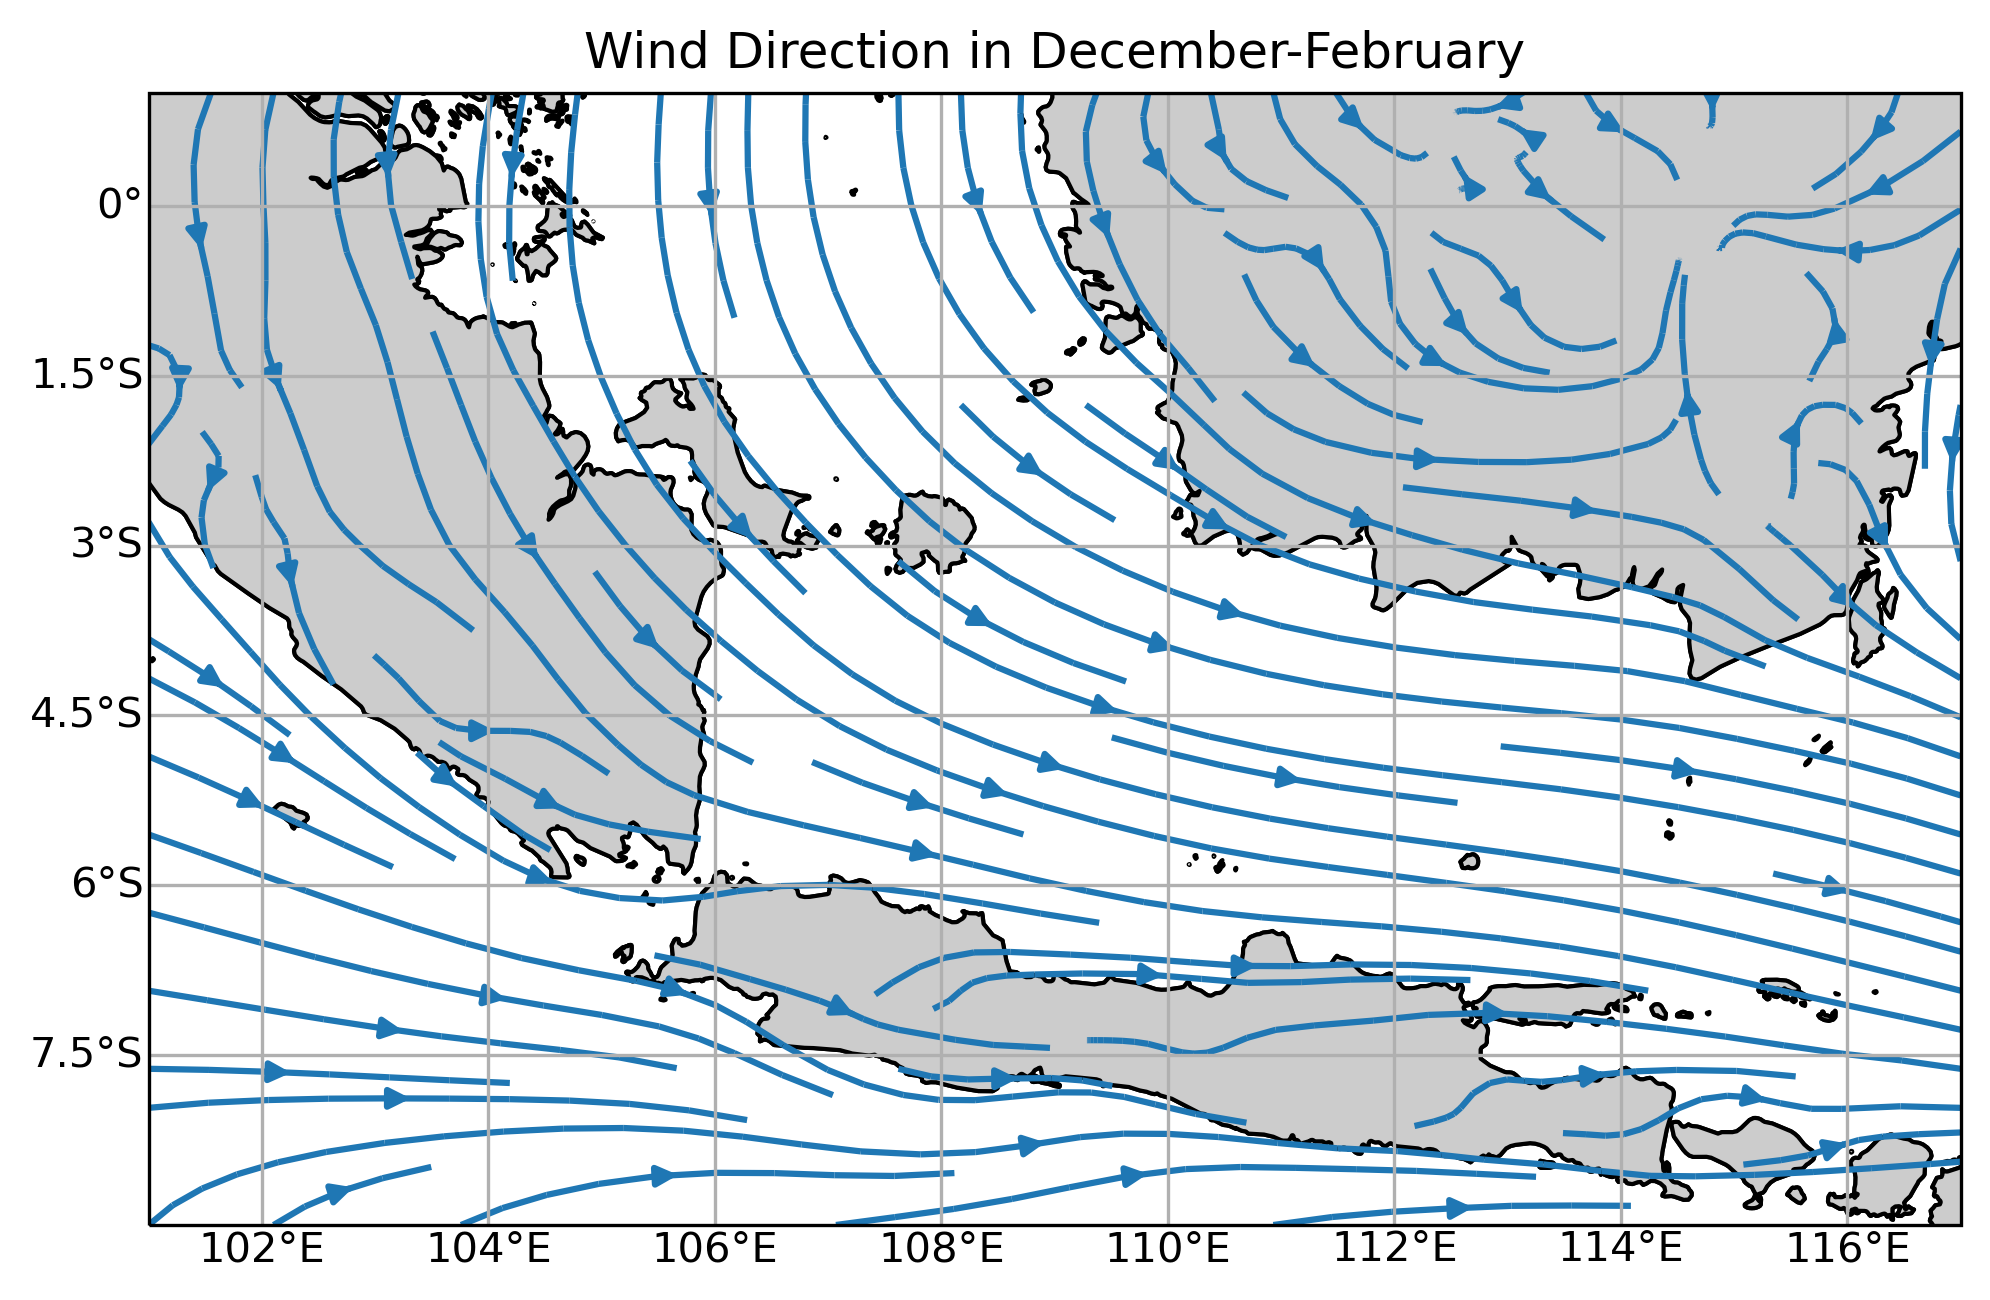

In [13]:
%%time

fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, dpi=300,
                      figsize=[10,5])

region=[101,117,-9,1]
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
ax.set_extent(region)

ax.streamplot(x=seasonal_wind.longitude.values, 
              y=seasonal_wind.latitude.values,
              u=seasonal_wind.sel(season='DJF').u10.values,
              v=seasonal_wind.sel(season='DJF').v10.values)

ax.set_title('Wind Direction in December-February')

# Exercise
Buatlah dengan season JJA

Wall time: 741 ms


Text(0.5, 1.0, 'Wind Direction in June-August')

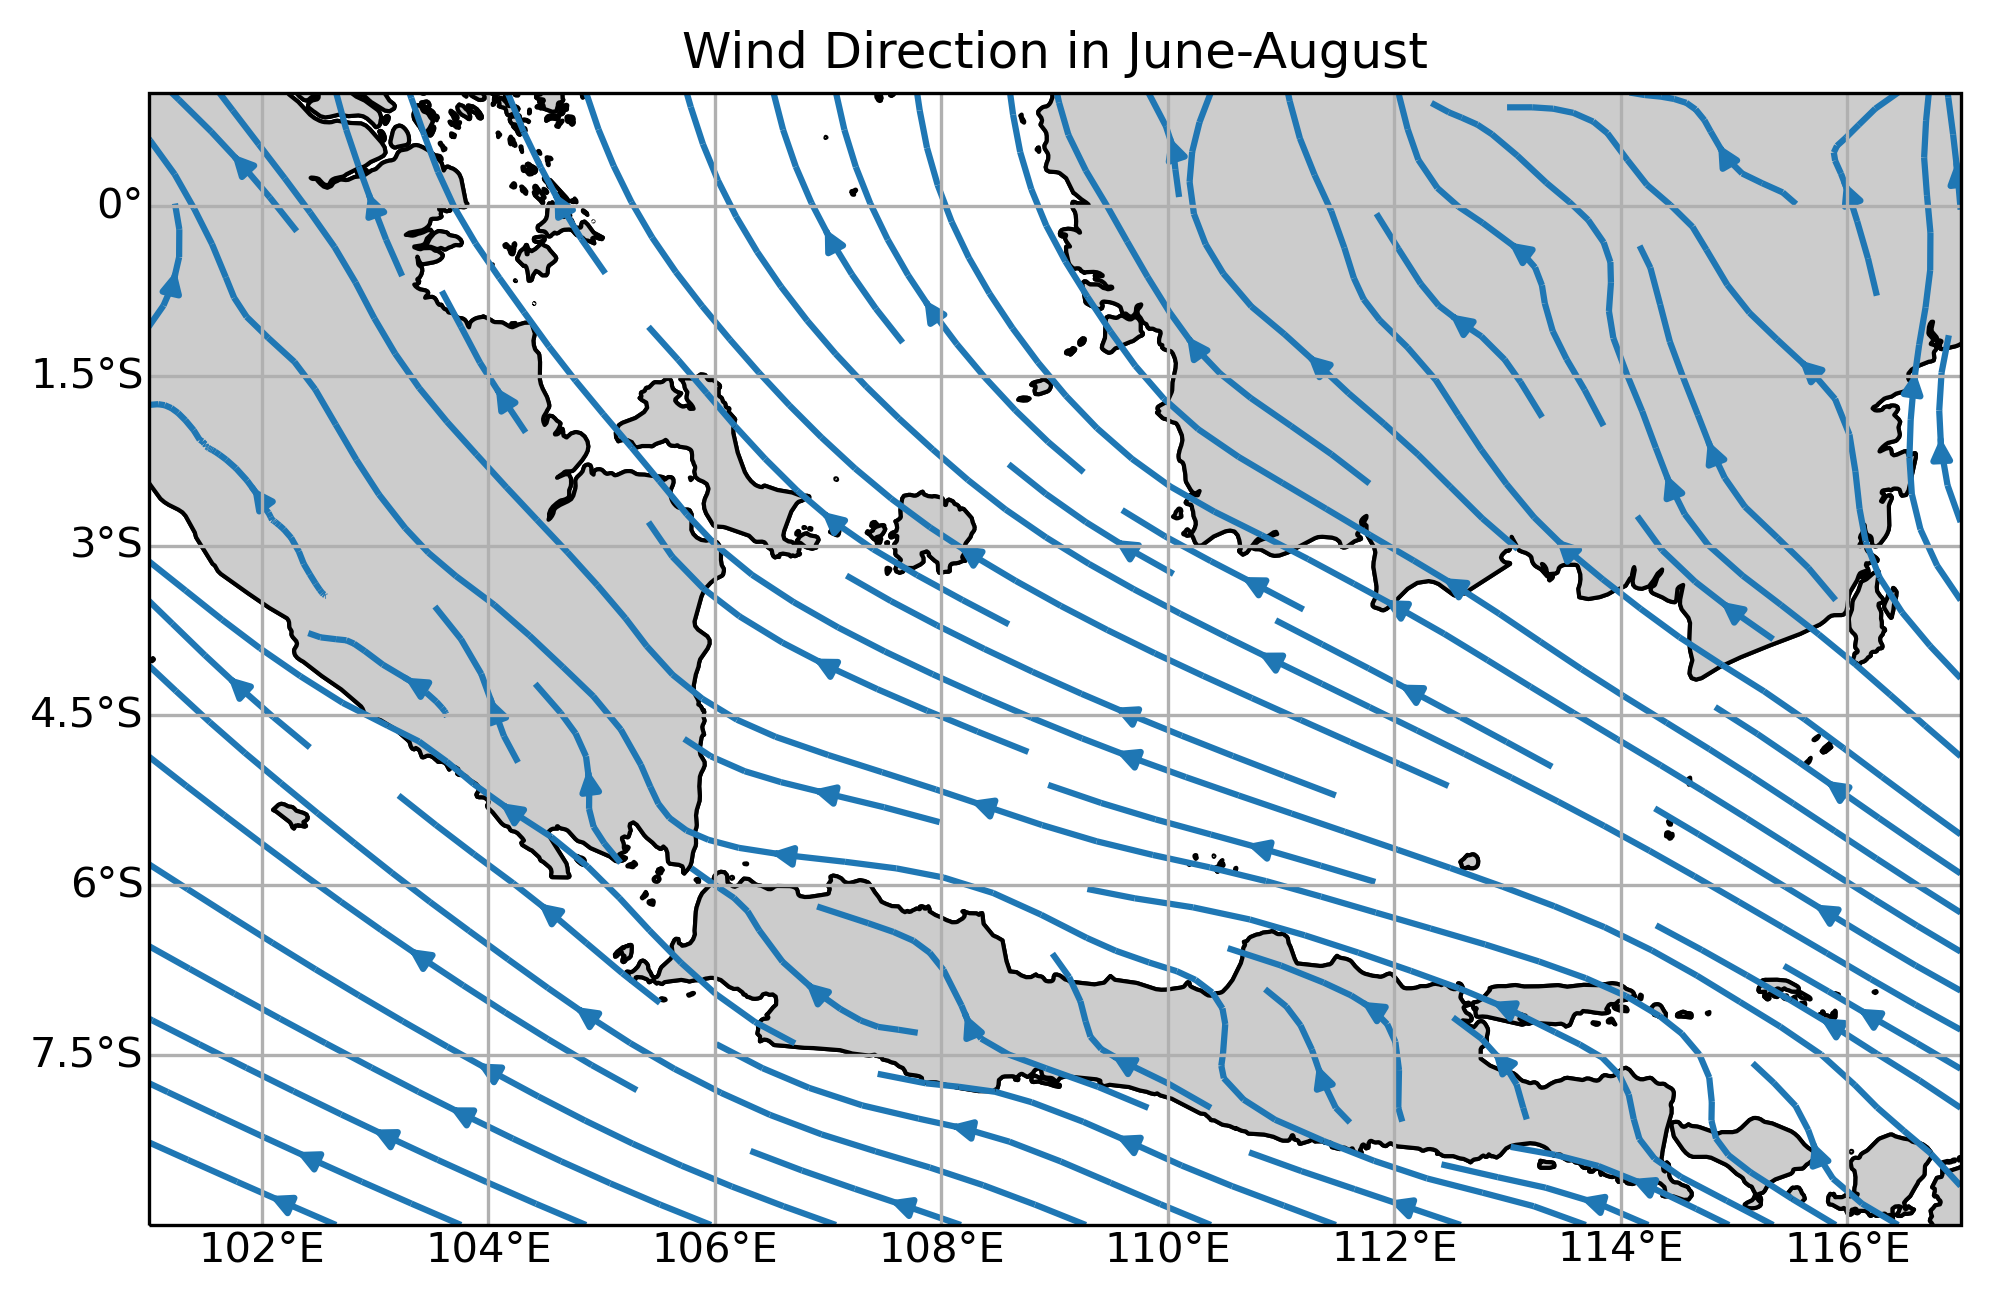

In [16]:
%%time

fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, dpi=300,
                      figsize=[10,5])

region=[101,117,-9,1]
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
ax.set_extent(region)

ax.streamplot(x=seasonal_wind.longitude.values, 
              y=seasonal_wind.latitude.values,
              u=seasonal_wind.sel(season='JJA').u10.values,
              v=seasonal_wind.sel(season='JJA').v10.values)

ax.set_title('Wind Direction in June-August')

## Kita gunakan magnitude (wind_speed) sebagai warna

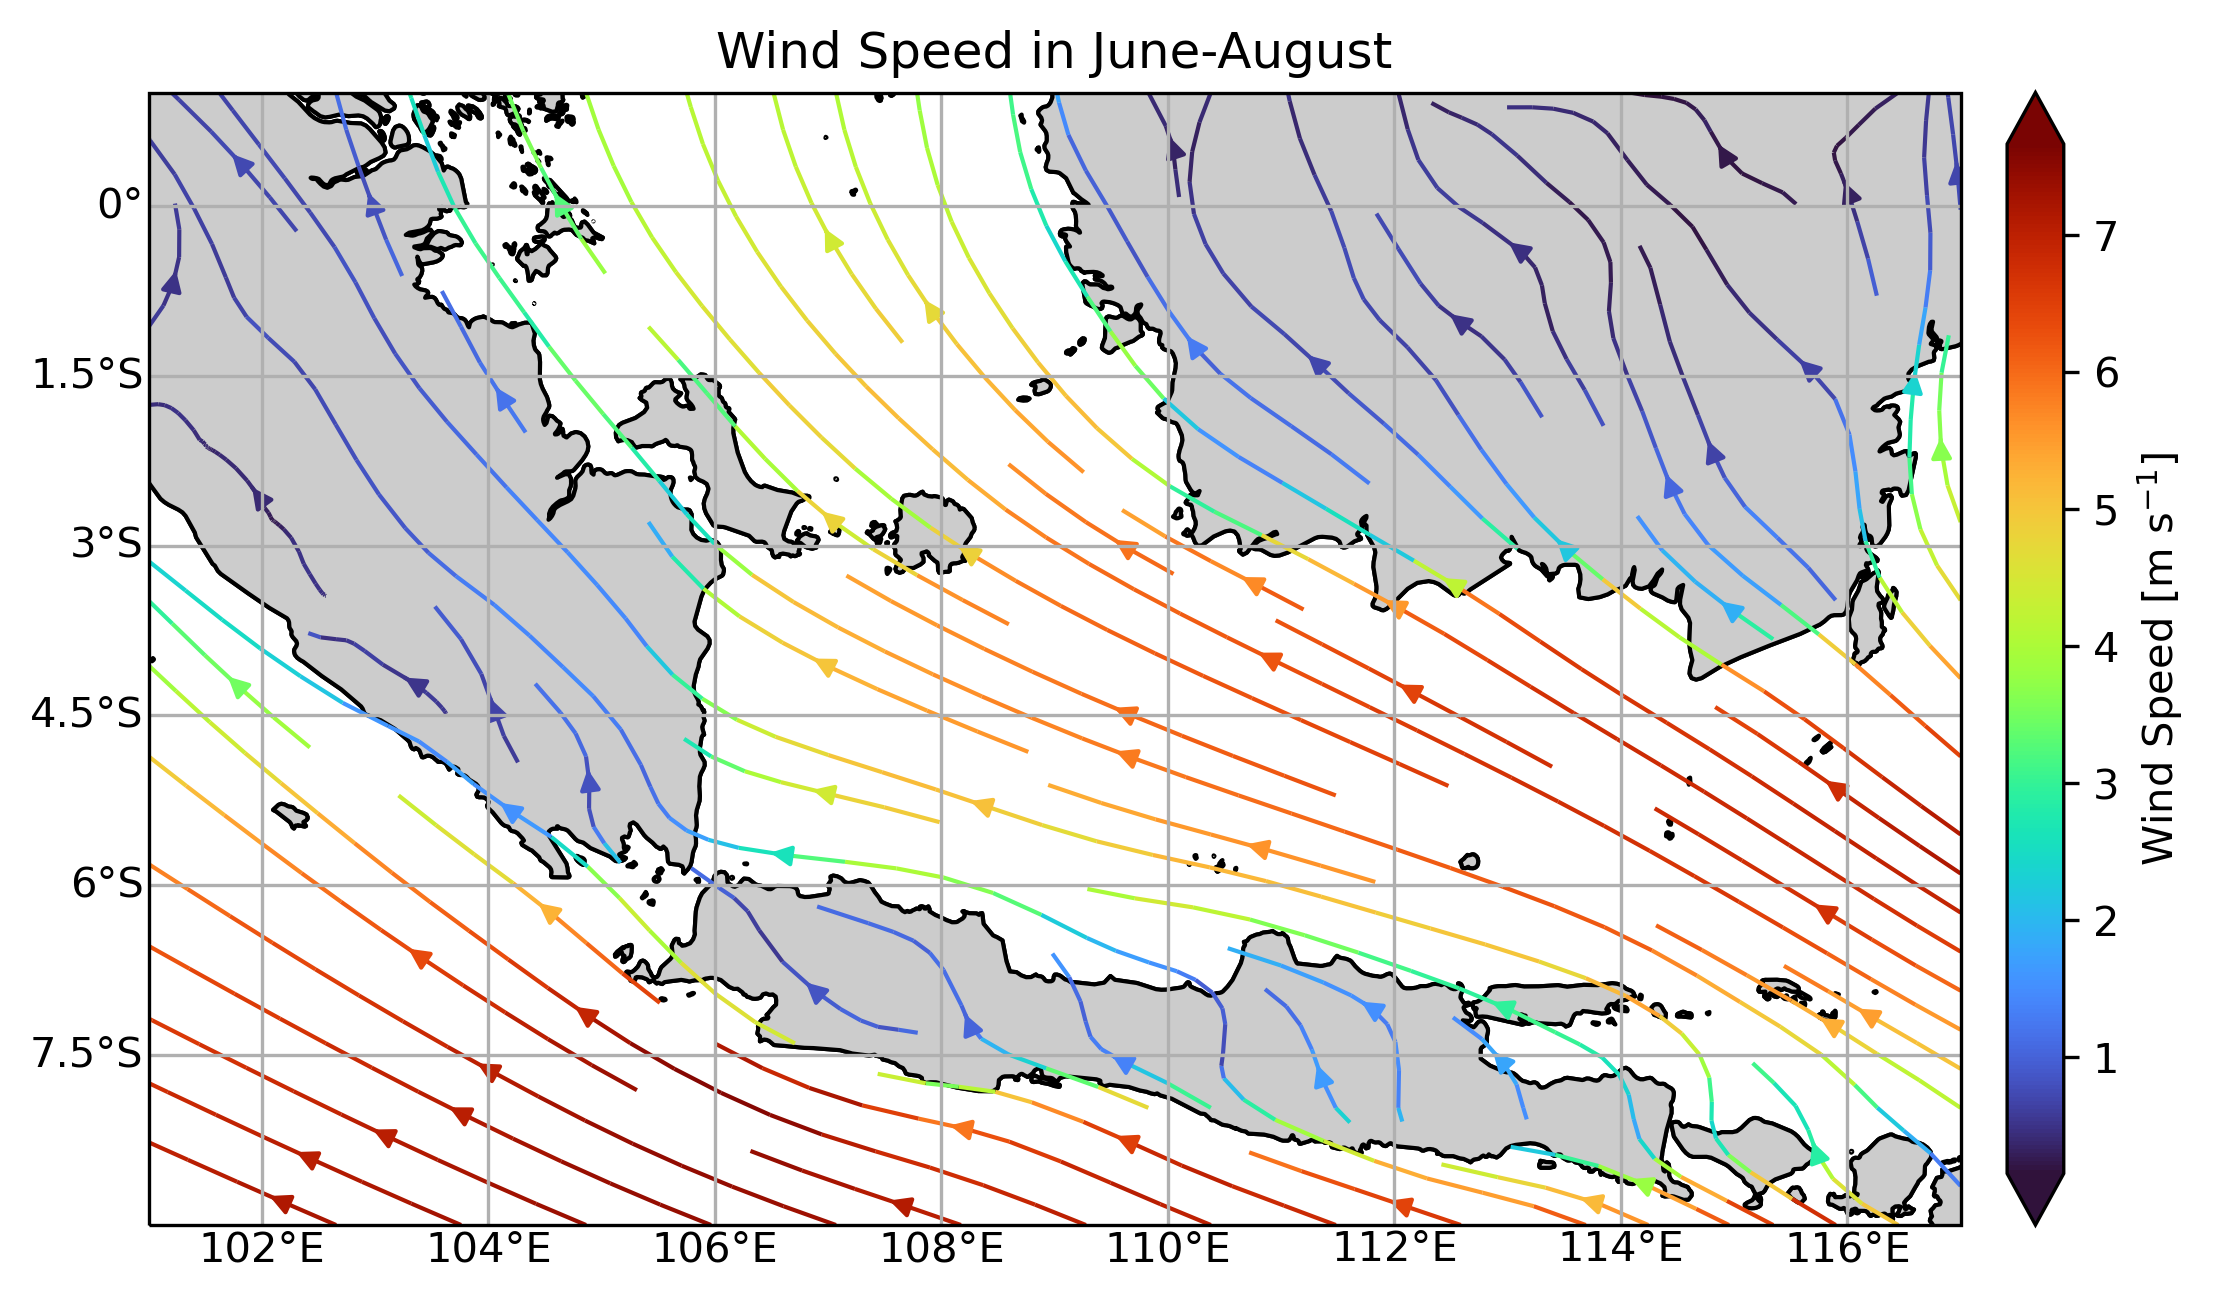

In [17]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, dpi=300,
                      figsize=[10,5])

region=[101,117,-9,1]
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
ax.set_extent(region)

strm=ax.streamplot(x=seasonal_wind.longitude, 
                   y=seasonal_wind.latitude,
                   u=seasonal_wind.sel(season='JJA').u10.values,
                   v=seasonal_wind.sel(season='JJA').v10.values,
                   color=seasonal_wind.sel(season='JJA').wind_speed.values, 
                   cmap='turbo',
                   density=1,
                   linewidth=1)

ax.set_title('Wind Speed in June-August')
cbar=fig.colorbar(strm.lines, pad=0.02, extend='both')
cbar.set_label('Wind Speed [m s$^{-1}$]')

## Kita combine antara SST dengan Angin

In [20]:
ds_sst=xr.open_dataset('sst_java_sea.nc', chunks={'time':1})
ds_sst

monthly_clim_sst = ds_sst.groupby('time.month').mean().sst
season_sst = ds_sst.groupby('time.season').mean().sst

monthly_clim_sst

season_sst

<xarray.DataArray 'sst' (season: 4, lat: 40, lon: 64)>
dask.array<concatenate, shape=(4, 40, 64), dtype=float32, chunksize=(1, 40, 64), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -8.875 -8.625 -8.375 -8.125 ... 0.375 0.625 0.875
  * lon      (lon) float32 101.1 101.4 101.6 101.9 ... 116.1 116.4 116.6 116.9
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

Wall time: 5.39 s


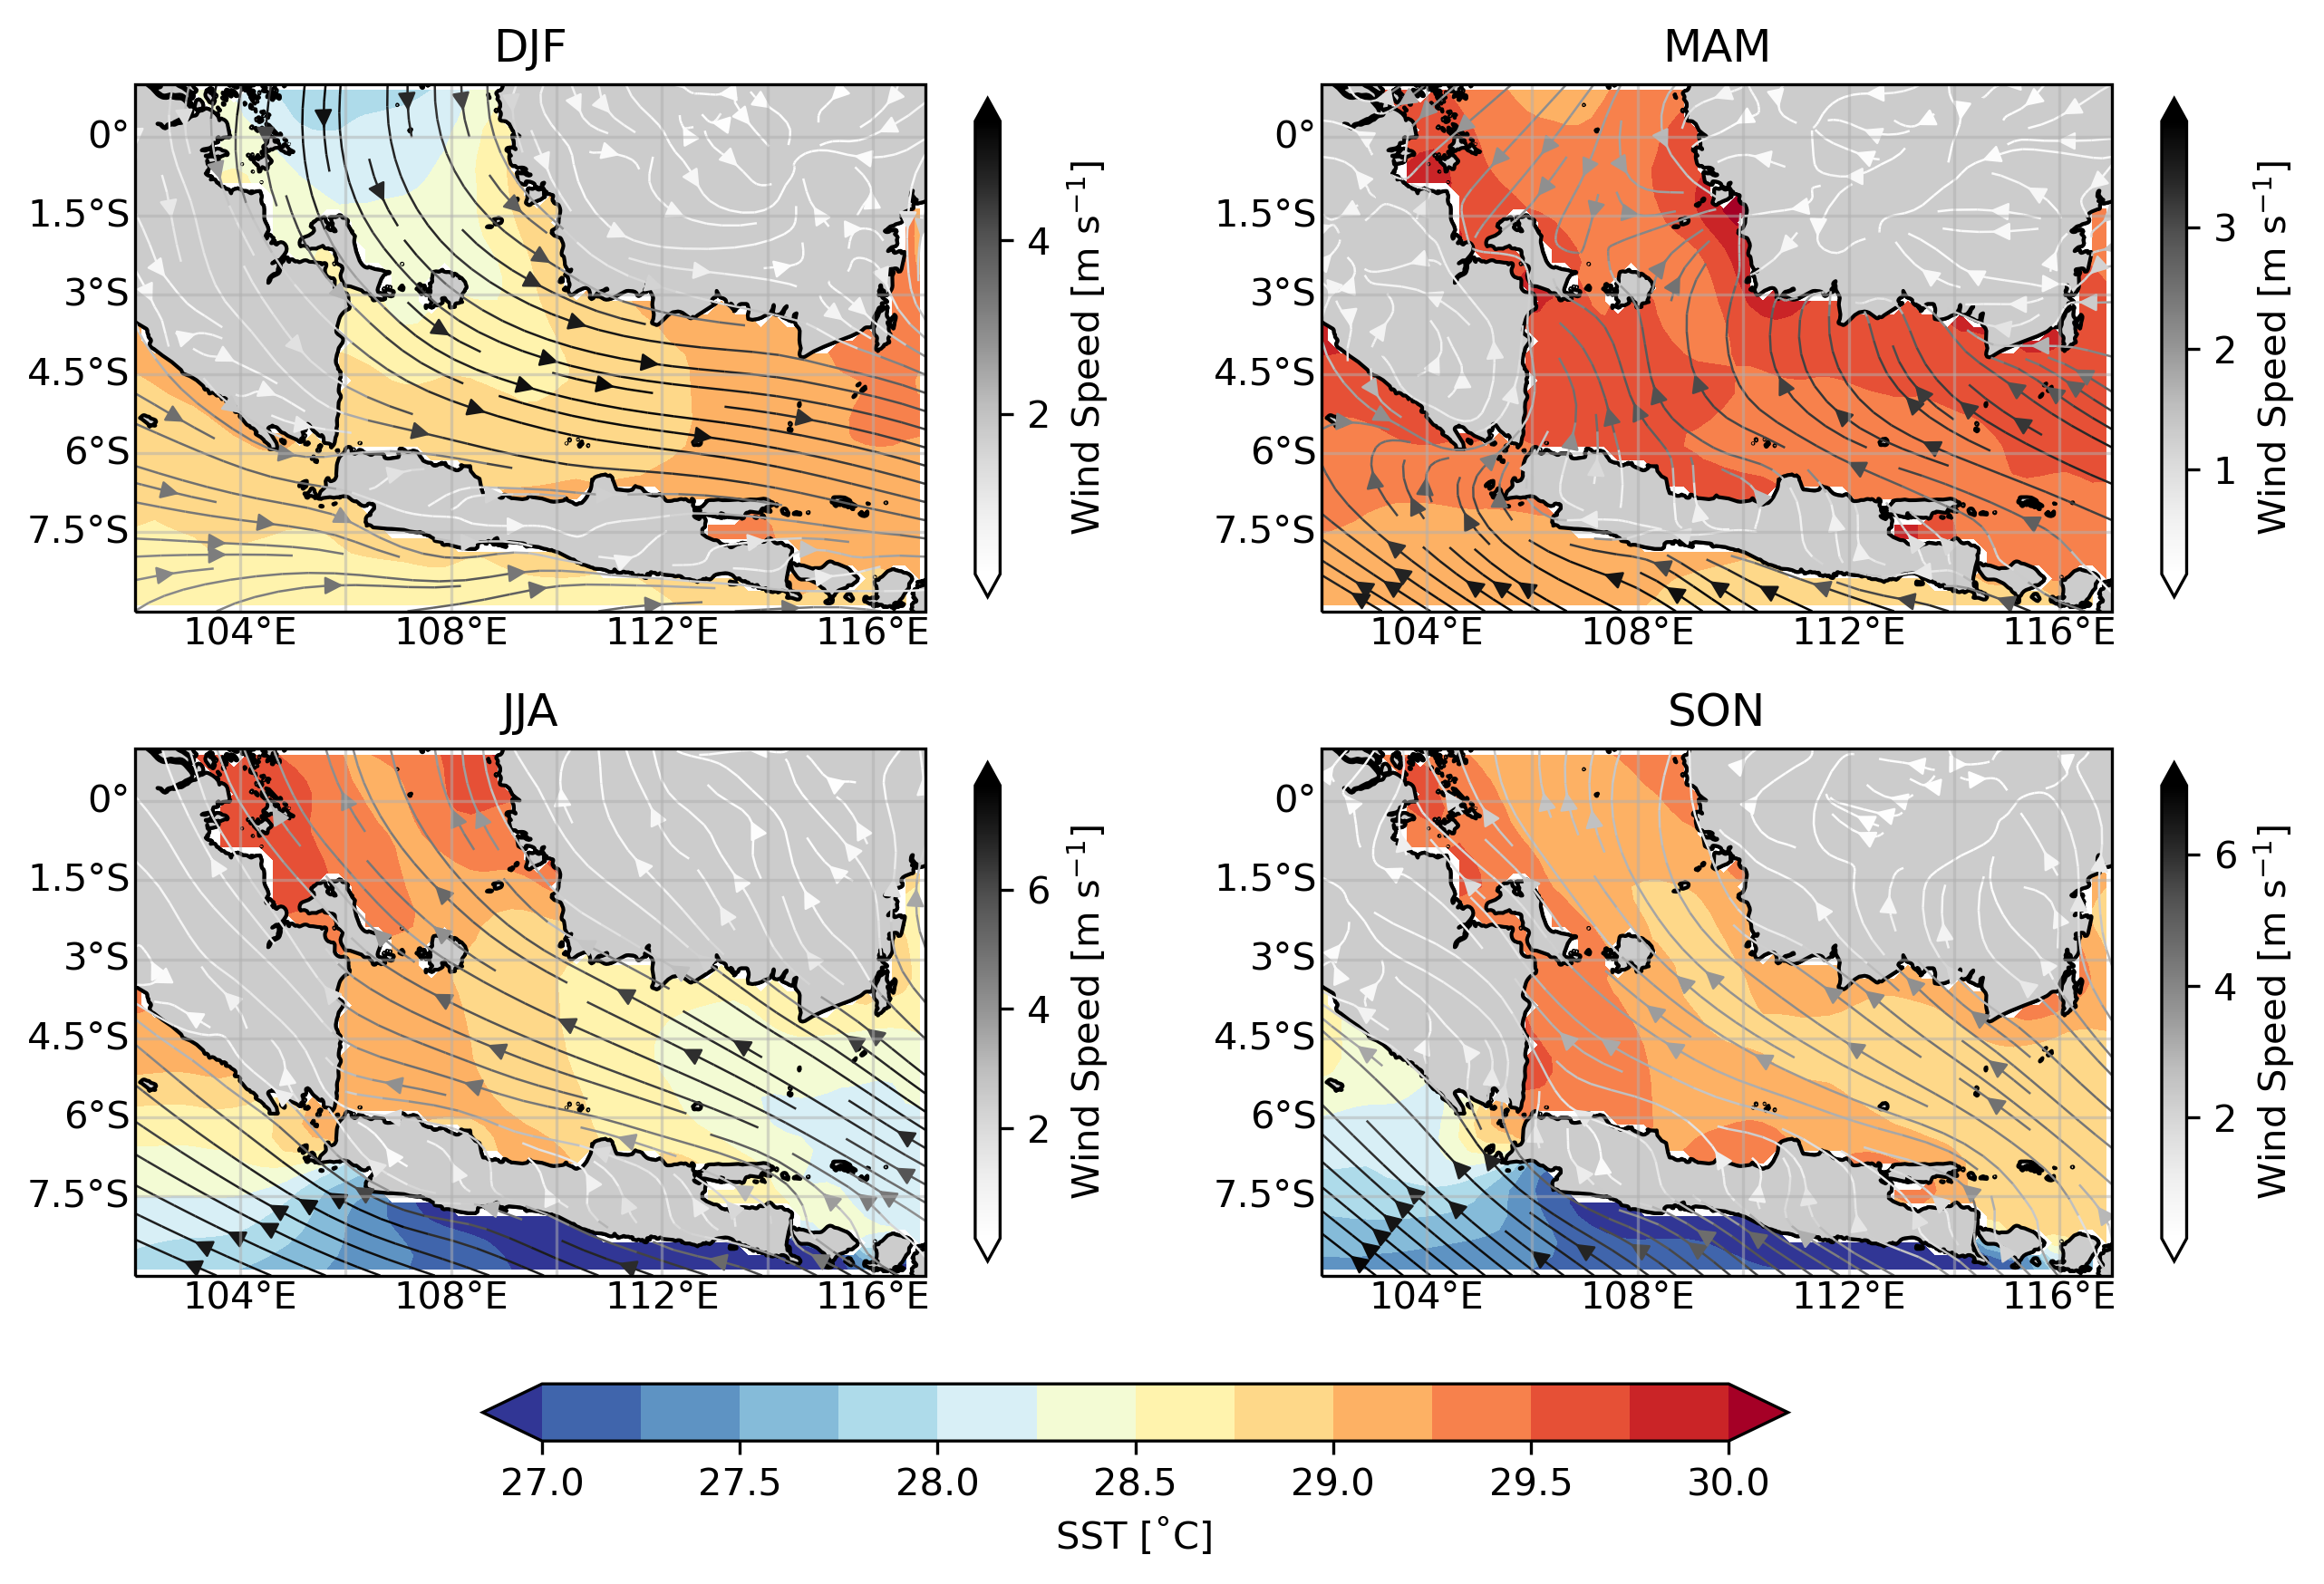

In [21]:
%%time

fig, axes = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                      ncols=2, nrows=2, dpi=300, figsize=[16,14])

axes_flatted = axes.flat
extent=[102,117,-9,1]
season_order = ['DJF', 'MAM', 'JJA', 'SON']
plt.subplots_adjust(left=0.5,right=1,bottom=0.68,top=1)

for i in range(len(season_sst.season)):
    axes_flatted[i].coastlines()
    axes_flatted[i].set_extent(extent)
    axes_flatted[i].add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
    gl=axes_flatted[i].gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    
    im=season_sst.sel(season=season_order[i]).plot.contourf(ax=axes_flatted[i],
                                                   levels=np.arange(27,30.01,0.25), 
                                                   extend='both', add_colorbar=False,
                                                   cmap='RdYlBu_r')
    
    strm=axes_flatted[i].streamplot(x=seasonal_wind.longitude, 
                                    y=seasonal_wind.latitude,
                                    u=seasonal_wind.sel(season=season_order[i]).u10.values,
                                    v=seasonal_wind.sel(season=season_order[i]).v10.values,
                                    color=seasonal_wind.sel(season=season_order[i]).wind_speed.values,
                                    cmap='Greys',
                                    density=1,
                                    linewidth=0.6)
    
    cbar_wind=fig.colorbar(strm.lines, ax=axes_flatted[i], extend='both', shrink=0.9)
    cbar_wind.set_label('Wind Speed [m s$^{-1}$]')
    axes_flatted[i].set_title(season_order[i])

cbaxes = fig.add_axes([0.58,0.64,0.3,0.015])
cbar =  fig.colorbar(im, ax=axes, cax=cbaxes, extend='both', orientation='horizontal') 
cbar.set_label('SST [˚C]')